# Airline price predictions

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Import the libraries

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data and data exploration

In [5]:
data = pd.read_excel('Data_Train.xlsx')

In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.shape

(10683, 11)

In [10]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Removing the null values

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
c_data = data.copy()

In [14]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

/var/folders/yh/z1154zn17c74v4p0c3d32jv80000gn/T/ipykernel_73165/1990600865.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col] = pd.to_datetime(data[col])


In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [21]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [22]:
### Extrtacting the date, month and year from the date of journey

In [23]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [24]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [25]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-27 05:50:00,2023-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [27]:
data.drop('Date_of_Journey', axis = 1, inplace = True)

In [28]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-27 05:50:00,2023-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-27 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


### Extrtacting the time in terms of hour and minutes from Departure and arrival time

In [29]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col, axis = 1, inplace = True)
    return df.head(2)

In [30]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [31]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### Performing data analysis

In [32]:
### When will most of the flights will take off

In [33]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [34]:
flight_count = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

In [35]:
flight_count

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<Axes: >

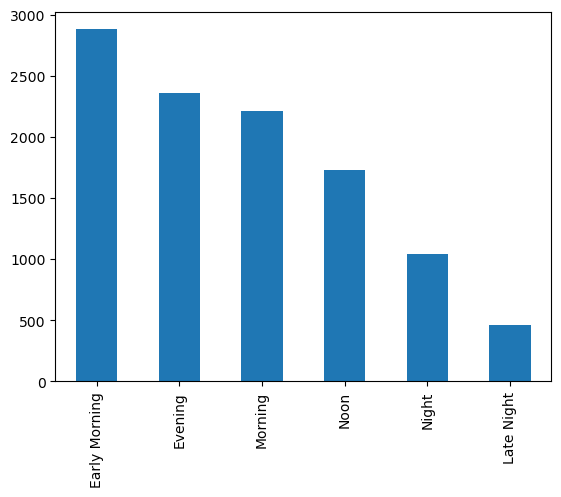

In [36]:
flight_count.plot(kind = 'bar')

### Install plotly for better visualisation

In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [38]:

pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [39]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [40]:
cf.go_offline()

In [41]:
### Using 'iplot'
flight_count.iplot(kind = 'bar')

### Preprocessing the duration feature

In [42]:
### Using the if-else statements

In [43]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'    
    return x

In [44]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [45]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
data['Duration'][0]

'2h 50m'

In [47]:
data['Duration'][0].split(' ')

['2h', '50m']

In [48]:
(data['Duration'][0].split(' ')[1])

'50m'

In [49]:
data['Duration'][0].split(' ')[0]

'2h'

In [50]:
### Converting these values form string to integers
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [51]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [52]:
### applying lambda funuction inorder to get the hours
data['Duration_hour'] = data['Duration'].apply(lambda x: 
                       int(data['Duration'][0].split(' ')[0][0:-1]))

In [53]:
### applying lambda funuction inorder to get the minutes
data['Duration_minutes'] = data['Duration'].apply(lambda x: 
                       int(data['Duration'][0].split(' ')[1][0:-1]))

In [54]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50


### Analyse wether the duration impacts the price or not..??

In [55]:
### Calculating the total minutes
eval('50*1+60*2')

170

In [56]:
data['Duration_total_minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [57]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1140


In [58]:
### lmplot is the combination of reggression and scatter plot

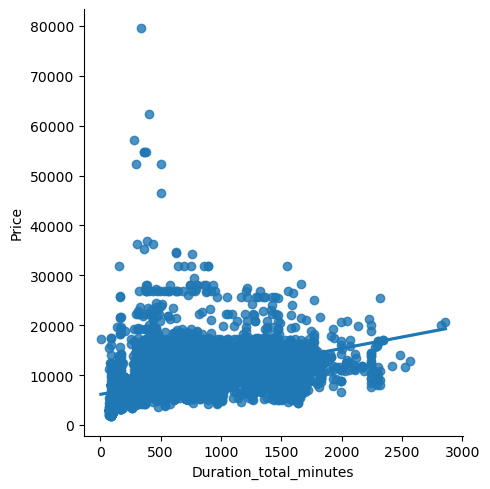

In [59]:
sns.lmplot(x='Duration_total_minutes', y = 'Price', data = data)

In [60]:
### Which city has the maximum final destination of flights
### main cities are Mumbai, Delhi and Bangalore

In [61]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='Destination'>

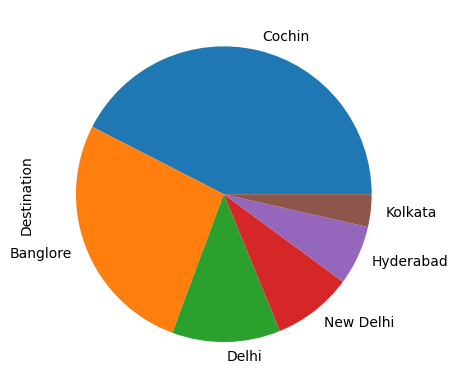

In [62]:
data['Destination'].value_counts().plot(kind = 'pie')

In [63]:
### on which route jet airways is extremely used

In [64]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [65]:
data[data['Airline'] == 'Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Duration_total_minutes
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,2,50,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,2,50,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,2,50,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,2,50,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,2,50,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,2,50,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,2,50,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,2,50,1485


In [66]:
### Counting the most travelled route for Jet airways

In [67]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [68]:
### Airline vs Price Analysis

In [69]:
from matplotlib.pyplot import figure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

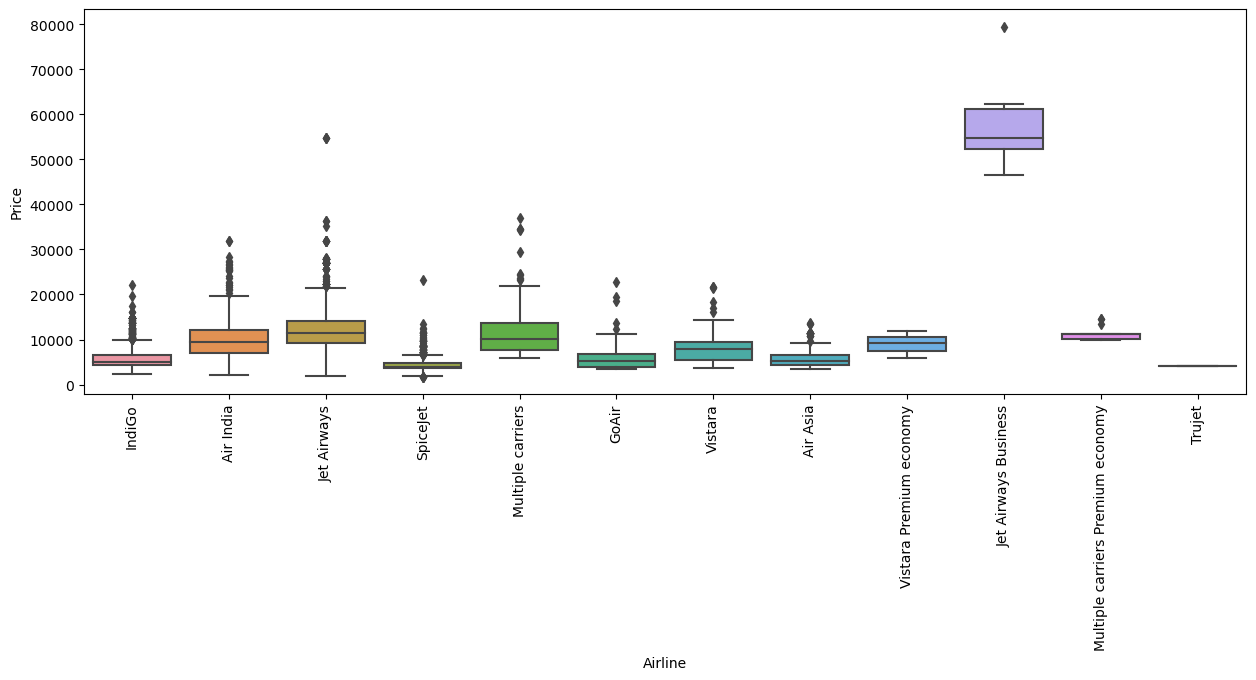

In [70]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')

In [71]:
## for boxplot + Distrubition of data we can use Violinplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

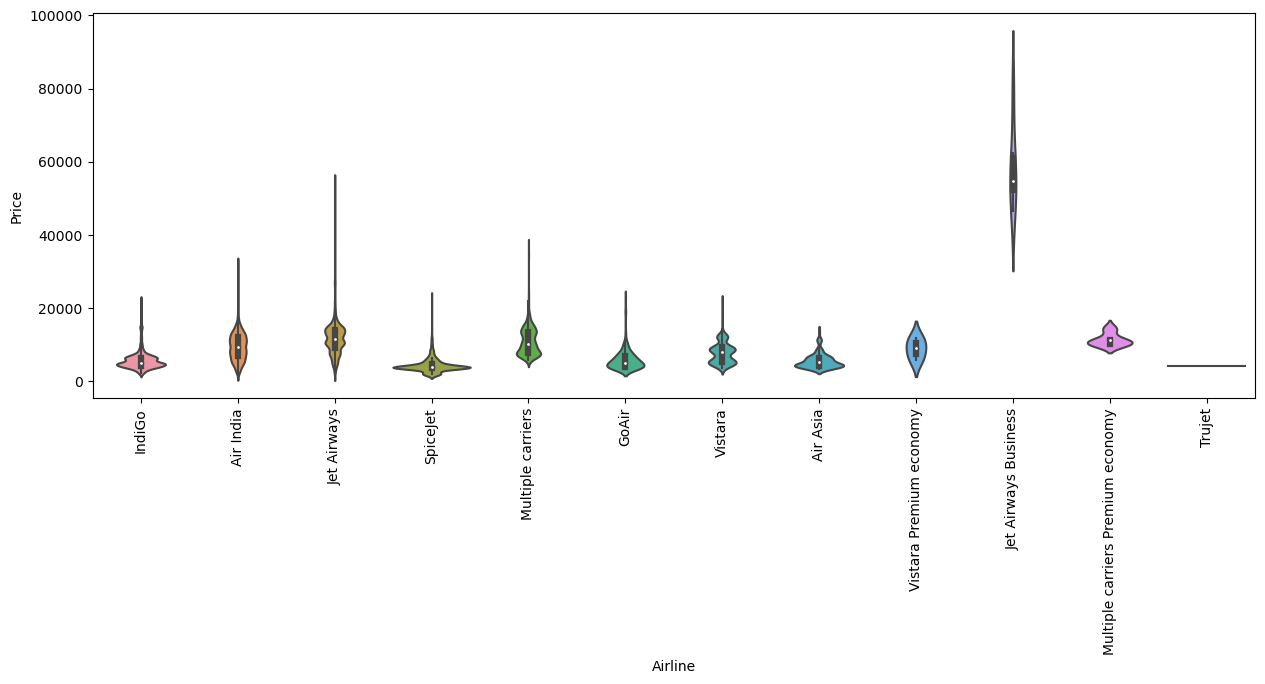

In [72]:
plt.figure(figsize=(15,5))
sns.violinplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')

### Handle Categorical data and applying one-hot encoding on the data

In [73]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [74]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [75]:
### Dropping the features not needed
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1140


In [76]:
data.drop(columns=['Additional_Info', 'Route', 'Duration_total_minutes', 'Journey_year'], axis = 1, inplace = True)

In [77]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

In [78]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,2,50


In [79]:
### Applying one-hot encoding on categoral data

In [80]:
# Categorcial columns
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [81]:
# numerical columns
num_col = [col for col in data.columns if data[col].dtype!='object']

In [82]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [83]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minutes']

In [84]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [85]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [86]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [87]:
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [88]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,2,50,0,0,1,0,0


#### Applying target guided encoding on data. 
####In roder to avoid creation of multiple colummns created by one hot encoding we use this method

In [89]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [90]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [91]:
dict1 = {key:index for index, key in enumerate(airlines,0)}

In [92]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [93]:
## Mapping the airline data into integer through the dictionary created above
data['Airline']=data['Airline'].map(dict1)

In [94]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [95]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50,0,1,0,0,0


In [96]:
## Delhi and New delhi have same airport
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [97]:
# replacing new delhi with delhi
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [98]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [99]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [100]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [101]:
dict2 = {key:index for index, key in enumerate(dest,0)}

In [102]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [103]:
data['Destination'] = data['Destination'].map(dict2)

In [104]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [105]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50,0,1,0,0,0


In [106]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [107]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [108]:
# MApping the Total_stops colummns with 
# the stops dictionary which we created above.
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [109]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### Performing the outlier detection
### How to deal with the outlier

In [110]:
def plot(df, col):
    fig,(ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False)

/var/folders/yh/z1154zn17c74v4p0c3d32jv80000gn/T/ipykernel_73165/184993094.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/yh/z1154zn17c74v4p0c3d32jv80000gn/T/ipykernel_73165/184993094.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




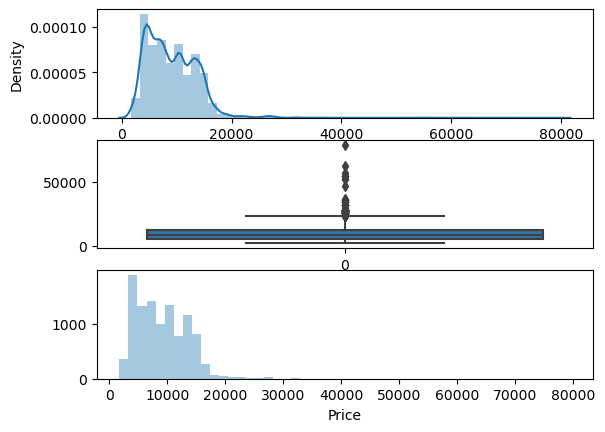

In [111]:
## detecting outliers using plots
plot(data, 'Price')

In [112]:
# We will replace the values of the outliers with 
# the median of the columns. Because if we use mean values 
# then it will affect our dataset badly whereas if we use 
# median if just pickups the middle value of the dataset
# and it remains unaffected

In [113]:
# Median approach
data['Price'] = np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])

/var/folders/yh/z1154zn17c74v4p0c3d32jv80000gn/T/ipykernel_73165/184993094.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/yh/z1154zn17c74v4p0c3d32jv80000gn/T/ipykernel_73165/184993094.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




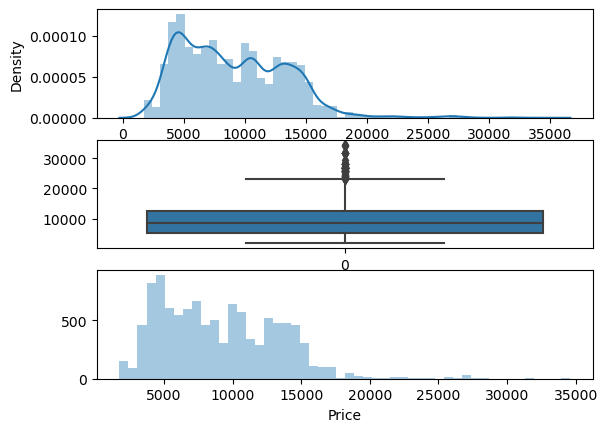

In [114]:
plot(data, 'Price')

### Selecting best features using Feature Selection Techniques

In [115]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,2,50,0,1,0,0,0


In [116]:
## We are only left with source and Duration as string colummns
# so we have to remove them

In [117]:
data.drop(columns=['Source', 'Duration'], axis = 1, inplace = True)

In [118]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,2,50,0,1,0,0,0


In [119]:
# Ensure that all the colummnsare in integer format before 
# feature selection
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hour            int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [120]:
pip install scikit-learn as sklearn

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.


In [121]:

from sklearn.feature_selection import mutual_info_regression

In [122]:
X = data.drop(['Price'], axis = 1)

In [123]:
y = data['Price']

In [124]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hour          int64
Duration_minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [125]:
mutual_info_regression(X, y)

array([0.97365858, 1.00978985, 0.79668119, 0.1966447 , 0.23809696,
       0.33611665, 0.25574642, 0.3973008 , 0.34780404, 0.00236704,
       0.        , 0.38150427, 0.46418657, 0.52146419, 0.1322448 ,
       0.20769678])

In [126]:
# Finding the percentage of dependency of price on features 
# (depending on two variables) 
# using mutual_info_regression
imp = pd.DataFrame(mutual_info_regression(X, y), index = X.columns)
imp

,0
Airline,0.974763
Destination,1.001235
Total_Stops,0.787992
Journey_day,0.184566
Journey_month,0.245628
Dep_Time_hour,0.338833
Dep_Time_minute,0.255876
Arrival_Time_hour,0.395630
Arrival_Time_minute,0.351071
Duration_hour,0.000000


In [127]:
imp.columns = ['importance']

In [128]:
imp.sort_values(by = 'importance', ascending = False)

,importance
Destination,1.001235
Airline,0.974763
Total_Stops,0.787992
Source_Delhi,0.526729
Source_Kolkata,0.458134
Arrival_Time_hour,0.395630
Source_Banglore,0.383140
Arrival_Time_minute,0.351071
Dep_Time_hour,0.338833
Dep_Time_minute,0.255876


### Building a ML model.

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Selecting the best model for the project

In [131]:
!pip3 install xgboost

In [132]:
#pip install lightgbm
#pip3 install xgboost
import xgboost

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
#import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [134]:
def mape(y_true, y_predict):
    y_true, y_predict = np.array(y_true), np.array(y_predict)
    
    return np.mean(np.abs(((y_true-y_predict)/y_true))*100)

In [135]:
# Train and evaluate multiple models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    #('LGBM', lgb.LGBMRegressor())
]

results = []
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    #Showing the training performance
    model_score = model.score(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Evaluate the model using r2_score
    R2_score = r2_score(y_test, y_pred)
    
    # Evaluate the model using Root mean squared error
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Evaluating the model on mean absolute error
    MAE = mean_absolute_error(y_test, y_pred)
    
    # Evaluating the model using the mean absolute percentage error
    #MAPE = mape(y_test, y_pred)
    
    #Cross-validation score
    CV_Score = (cross_val_score(model, X, y, cv=10, scoring="r2").mean())
    
    # Store the results
    results.append((name, mse, CV_Score, model_score, MAE, RMSE))

# Compare the results
df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'R2/CV_score','model_training_score', 'MAE', 'RMSE'])
df_results.sort_values(by='MSE', ascending=True, inplace=True)
print(df_results)

               Model           MSE  R2/CV_score  model_training_score  \
3            XGBoost  3.192565e+06     0.842810              0.926384   
2      Random Forest  3.539500e+06     0.806658              0.951341   
1      Decision Tree  5.633052e+06     0.705505              0.966473   
0  Linear Regression  8.654017e+06     0.572677              0.579300   

           MAE         RMSE  
3  1155.319826  1786.775126  
2  1157.169271  1881.355873  
1  1321.443467  2373.405111  
0  2064.293406  2941.771099  


## As we can see xgboost outperforms all the other models so now we will be hypertuning out best model to enhance the performance of it.

In [136]:
### Using the RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [137]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
}

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform the randomized search for hyperparameter tuning
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Print the best parameters and best score
print('Best Parameters:', xgb_random.best_params_)
print('Best Score:', xgb_random.best_score_)
print('Model_training_score: ', xgb_random.score(X_train, y_train))

# Evaluate the best model on the test set
y_pred1 = xgb_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
print('Test MSE:', mse)
r2 = metrics.r2_score(y_test, y_pred1)
print('R2 Score: ', r2)

Best Parameters: {'subsample': 0.8, 'n_estimators': 450, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.8333557167449545
Model_training_score:  0.9062558591163482
Test MSE: 3079036.58016069
R2 Score:  0.8418378930593928


In [138]:
## Adding the best parameter to the xgboost model
xgb_bst_model = xgb.XGBRegressor( subsample= 0.8, n_estimators= 450, min_child_weight= 3, max_depth= 6, learning_rate= 0.05, gamma= 0.2, colsample_bytree= 0.6,objective='reg:squarederror', random_state=42)

In [139]:
print("Training Data Types:\n", X_train.dtypes)
print("Training Data Columns:\n", X_train.columns)

Training Data Types:
 Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hour          int64
Duration_minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object
Training Data Columns:
 Index(['Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')


In [150]:
model = xgb_bst_model.fit(X_train, y_train)
y_pred_bst = xgb_bst_model.predict(X_test)

mse_bst = mean_squared_error(y_test, y_pred_bst)
print('Test MSE:', mse)
r2_bst = metrics.r2_score(y_test, y_pred_bst)
print('R2 Score: ', r2_bst)

# Evaluate the model using Root mean squared error
RMSE_bst = np.sqrt(mean_squared_error(y_test, y_pred_bst))
print('RMSER=',RMSE_bst)

Test MSE: 3079036.58016069
R2 Score:  0.8418378930593928
RMSER= 1754.718376310196


In [141]:
CV_Score_bst = (cross_val_score(xgb_bst_model, X, y, cv=10, scoring="r2").mean())
print('Best CV score or R2 score: ',CV_Score_bst)

Best CV score or R2 score:  0.8476979480680642


In [142]:
print('Training score: {}'.format(xgb_bst_model.score(X_train, y_train)))
print('Predictions are : {}'.format(y_pred_bst))
print('/n')

Training score: 0.9062558591163482
Predictions are : [17239.684   6965.0146  8499.467  ...  3588.06    8337.479   6539.194 ]
/n


In [143]:
print(y_test)
print(y_test.shape)

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
         ...   
3022    13555.0
8416    12760.0
2605     3419.0
1392     5797.0
8535     6818.0
Name: Price, Length: 2671, dtype: float64
(2671,)


In [144]:
print(y_pred_bst)
print(y_pred_bst.shape)

[17239.684   6965.0146  8499.467  ...  3588.06    8337.479   6539.194 ]
(2671,)


## Creating the model on disc space

In [145]:
import pickle

In [146]:
file = open(r'/Users/amitsahani/WORK_SPACE/PROJECTS/Main/xgb_bst_model1.pkl', 'wb')

In [147]:
pickle.dump(model, file)

In [148]:
model = open(r'/Users/amitsahani/WORK_SPACE/PROJECTS/Main/xgb_bst_model1.pkl', 'rb')

In [149]:
boost=pickle.load(model)

EOFError: Ran out of input

In [ ]:
boost.predict(X_test)

In [ ]:
#filename = "xgb_bst_model.pkl"

# save model
#pickle.dump(xgb_bst_model, open(filename, "wb"))

# load model
#boost = pickle.load(open(filename, "rb"))


In [ ]:
#loaded_model.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test, boost.predict(X_test))

In [ ]:
## How to automate ml pipeline!

In [ ]:
def predict(ml_model):
    
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('/n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2_score : {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test, y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE : ', mape(y_test, y_prediction))
    sns.distplot(y_test-y_prediction)
        

In [ ]:
predict(RandomForestRegressor())

### How to hypertune our model

In [ ]:
xgb_bst_model = xgb.XGBRegressor( subsample= 0.8, n_estimators= 450, min_child_weight= 3, max_depth= 6, learning_rate= 0.05, gamma= 0.2, colsample_bytree= 0.6,objective='reg:squarederror', random_state=42)

In [ ]:
xgb_bst_model.fit(X_train, y_train)

In [ ]:
pred2 = xgb_bst_model.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test, pred2)

In [ ]:
print("Shape of test data:", X_test.shape)
print("Column names of test data:", X_test.columns)

In [ ]:
print("Shape of test data:", X_train.shape)
print("Column names of test data:", X_train.columns)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
print(xgb.__version__)

In [ ]:
print("Training Data Types:\n", X_train.dtypes)
print("Training Data Columns:\n", X_train.columns)


In [ ]:
print("Training Data Types:\n", X_test.dtypes)
print("Training Data Columns:\n", X_test.columns)
